In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/content/drive/MyDrive/usdrub1.csv', index_col='DATE', parse_dates=['DATE'])
df.corr()

,dollar,brent,ruble,IMOEX,RGBITR,RUCBITR
dollar,1.000000,-0.700562,0.944218,0.755933,0.876987,0.894266
brent,-0.700562,1.000000,-0.624580,-0.264823,-0.353175,-0.380334
ruble,0.944218,-0.624580,1.000000,0.767205,0.889785,0.913730
IMOEX,0.755933,-0.264823,0.767205,1.000000,0.874327,0.887939
RGBITR,0.876987,-0.353175,0.889785,0.874327,1.000000,0.995952
RUCBITR,0.894266,-0.380334,0.913730,0.887939,0.995952,1.000000


In [3]:
df.isna().count()

dollar     4181
brent      4181
ruble      4181
IMOEX      4181
RGBITR     4181
RUCBITR    4181
dtype: int64

In [4]:
y = df.ruble
x = df.drop('ruble', axis=1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3340, 5) (3340,) (836, 5) (836,)


In [19]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled.max(), x_train_scaled.min())

1.0 0.0


In [20]:
model = LinearRegression()
model = model.fit(x_train_scaled, y_train)

In [21]:
train_pred = model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, train_pred)
train_mse

17.538475555455868

In [22]:
test_pred = model.predict(x_test_scaled)
test_mse = mean_squared_error(y_test, test_pred)
test_mse

23.881836674568188

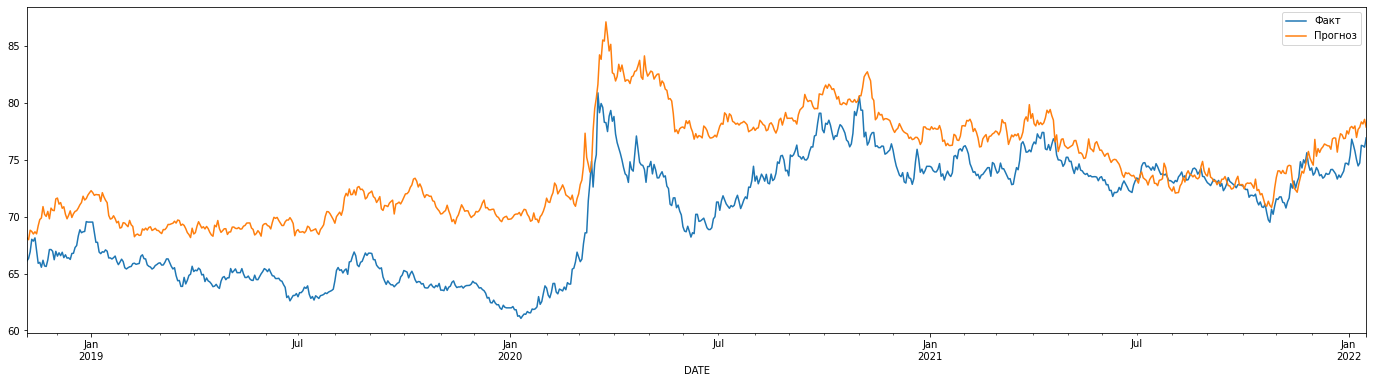

In [23]:
test = pd.DataFrame(list(zip(y_test, test_pred)), index=y_test.index, columns=['Факт', 'Прогноз'])
test.plot(figsize=(24, 6))

In [17]:
y = df.ruble[5:]
x = df.drop('ruble', axis=1)[:-5]

In [24]:
x = df.drop('ruble', axis=1)[-5:]
x_scaled = scaler.transform(x)
pred = model.predict(x_scaled)
pred

array([77.8085758 , 78.55363847, 79.71491351, 80.6072599 , 80.59765329])